In [1]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2
%load_ext pyinstrument

import sys
sys.path.insert(0,'..')


In [2]:
#imports 
import os
import numpy as np
import pandas as pd

from src.utils import plot_image, plot_im, save_im


In [9]:
# 193 images before removin plural and images which are not accepted by armoria 
# 150 afterwards

data_location='/home/salnabulsi/coat-of-arms/data/new/'
# test_caption_file  = data_location + '/test_real_captions.txt'
test_caption_file = data_location + 'full-captions.txt'

root_folder_images = data_location + '/images'

df = pd.read_csv(test_caption_file)

print("There are {} test images".format(len(df)))

df

There are 195 test images


,image,caption
0,19245_O B lion rampant.jpg,O B lion rampant
1,22611_G A 3 lions.jpg,G A 3 lions
2,7788_S A cross.jpg,S A cross
3,9516_O S 3 lions passt guard.jpg,O S 3 lions passt guard
4,7350_A V lion rampant.jpg,A V lion rampant
...,...,...
190,29743_O A eagle.jpg,O A eagle
191,19997_B A cross.jpg,B A cross
192,10757_B O eagle.jpg,B O eagle
193,22050_B A lion rampant.jpg,B A lion rampant


## Get the sizes of the images

In [10]:
from PIL import Image
ls = []
ims_size = []
for im in df['image']:
    image_full_path = root_folder_images + '/' + im
    img = Image.open(image_full_path).convert("RGB")
    ls.append(img.size)
    ims_size.append({'img': im, 'size': img.size })


## Get the image label with it's matching size 

In [11]:
for item in ims_size:
    print(item)

{'img': '19245_O B lion rampant.jpg', 'size': (637, 598)}
{'img': '22611_G A 3 lions.jpg', 'size': (636, 584)}
{'img': '7788_S A cross.jpg', 'size': (667, 618)}
{'img': '9516_O S 3 lions passt guard.jpg', 'size': (1358, 1541)}
{'img': '7350_A V lion rampant.jpg', 'size': (111, 109)}
{'img': '2737_A S 2 lions passt guard.jpg', 'size': (456, 529)}
{'img': '5855_O S cross.jpg', 'size': (641, 654)}
{'img': '-1_O S lion naissant.jpg', 'size': (963, 1109)}
{'img': '3227_G O 2 lions passt guard.jpg', 'size': (605, 746)}
{'img': '19320_A S cross.jpg', 'size': (133, 147)}
{'img': '17591_S A eagle.jpg', 'size': (585, 629)}
{'img': '-1_O S eagle.jpg', 'size': (492, 765)}
{'img': '12436_V A cross.jpg', 'size': (632, 640)}
{'img': '3298_O S 3 lions.jpg', 'size': (586, 822)}
{'img': '6150_A G cross.jpg', 'size': (650, 652)}
{'img': '2540_B A lion rampant.jpg', 'size': (615, 610)}
{'img': '17941_A G lion rampant.jpg', 'size': (601, 642)}
{'img': '7037_A G cross.jpg', 'size': (712, 584)}
{'img': '4382

## Get the min/max size of the images

In [12]:
import operator

unique_sizes = list(set(ls))
print(f' Total number of unique_sizes: {len(unique_sizes)}')

min_size = min(unique_sizes, key=operator.itemgetter(1))
max_size = max(unique_sizes, key=operator.itemgetter(1))
print(f' min size: {min_size}\n max size: {max_size}')


 Total number of unique_sizes: 193
 min size: (111, 109)
 max size: (2095, 2105)


#### min size image: {'img': '7350_A V lion rampant.jpg', 'size': (111, 109)}

#### max size image:{'img': '3324_O G lion rampant.jpg', 'size': (2095, 2105)}



# Get the average size of the images

In [13]:
def get_avg_size(root_folder_images, listofimages):
    h, w = 0, 0
    for p in listofimages:
        image_full_path = root_folder_images + '/' + p
        im = Image.open(image_full_path)
        width, height = im.size
        h += height
        w += width
        print('Process image {0} and height-weight is {1} '.format(p, im.size))

    print('Calculate average w-h: {0} ~ {1}'.format(w //len(listofimages), h//len(listofimages)))
    return w//len(listofimages), h//len(listofimages)

In [14]:
width, height = get_avg_size(root_folder_images, df['image'])
width, height

Process image 19245_O B lion rampant.jpg and height-weight is (637, 598) 
Process image 22611_G A 3 lions.jpg and height-weight is (636, 584) 
Process image 7788_S A cross.jpg and height-weight is (667, 618) 
Process image 9516_O S 3 lions passt guard.jpg and height-weight is (1358, 1541) 
Process image 7350_A V lion rampant.jpg and height-weight is (111, 109) 
Process image 2737_A S 2 lions passt guard.jpg and height-weight is (456, 529) 
Process image 5855_O S cross.jpg and height-weight is (641, 654) 
Process image -1_O S lion naissant.jpg and height-weight is (963, 1109) 
Process image 3227_G O 2 lions passt guard.jpg and height-weight is (605, 746) 
Process image 19320_A S cross.jpg and height-weight is (133, 147) 
Process image 17591_S A eagle.jpg and height-weight is (585, 629) 
Process image -1_O S eagle.jpg and height-weight is (492, 765) 
Process image 12436_V A cross.jpg and height-weight is (632, 640) 
Process image 3298_O S 3 lions.jpg and height-weight is (586, 822) 
Proc

Process image 2736_A S 2 lions passt guard cowardly.jpg and height-weight is (1332, 1467) 
Process image 597_V O cross moline.jpg and height-weight is (652, 624) 
Process image 17931_O B lion rampant.jpg and height-weight is (570, 574) 
Process image 1307_O G eagle.jpg and height-weight is (571, 650) 
Process image 16446_A G 2 lions passt guard cr..jpg and height-weight is (309, 317) 
Process image 779_O S 3 lions.jpg and height-weight is (651, 598) 
Process image 2617_O G cross.jpg and height-weight is (630, 603) 
Process image 1335_G A lion rampant.jpg and height-weight is (679, 622) 
Process image 6250_G O eagle.jpg and height-weight is (466, 479) 
Process image 10651_A G lion rampant.jpg and height-weight is (887, 896) 
Process image 19188_O G cross.jpg and height-weight is (650, 640) 
Process image 5007_G O 2 lions passt guard.jpg and height-weight is (620, 588) 
Process image -1_O G lion rampant.jpg and height-weight is (578, 555) 
Process image 2712_G A eagle.jpg and height-weig

(626, 641)

## Resize the image and plot it before & after

In [15]:
width, height = 621, 634

In [16]:
def convert_in_same_size(data_location, width, height, listofimages):
    avg_size = width, height
    for image_name in listofimages:
        image_full_path = data_location + '/images/' + image_name
        image_destination = data_location + '/resized/'+ image_name
        _resize_one_image(avg_size, image_full_path, image_destination)

def _resize_one_image(avg_size, image_full_path, image_destination):
    image = Image.open(image_full_path)
    image.thumbnail(avg_size, Image.ANTIALIAS)
    image.save(image_destination)
    print('Saved image {0} and size is {1}'.format(image_destination, avg_size))
    return image
        

(574, 574)


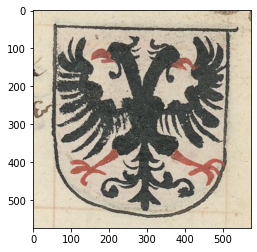

/tmp/ipykernel_1238034/2026331432.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail(avg_size, Image.ANTIALIAS)


Saved image /home/salnabulsi/coat-of-arms/data/new/resized/1537_A S eagle doubleheaded.jpg and size is (621, 634)
(574, 574)


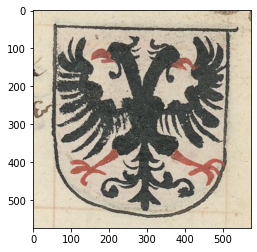

In [51]:
avg_size = width, height

# random image 
image_name = '1537_A S eagle doubleheaded.jpg'
image_full_path = root_folder_images + '/' + image_name
image_destination = data_location + '/resized/'+ image_name

org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = _resize_one_image(avg_size, image_full_path, image_destination)
print(res_im.size)
plot_im(res_im)


(111, 109)


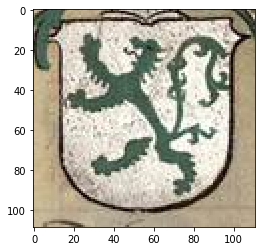

Saved image /home/salnabulsi/coat-of-arms/data/new/resized/7350_A V lion rampant.jpg and size is (621, 634)
(111, 109)


/tmp/ipykernel_1238034/2026331432.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail(avg_size, Image.ANTIALIAS)


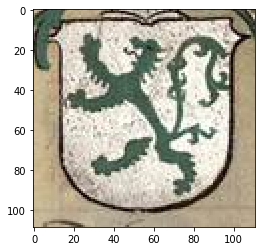

In [52]:


# min image 
image_name = '7350_A V lion rampant.jpg'
image_full_path = root_folder_images + '/' + image_name
image_destination = data_location + '/resized/'+ image_name

org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = _resize_one_image(avg_size, image_full_path, image_destination)
print(res_im.size)
plot_im(res_im)


(2095, 2105)


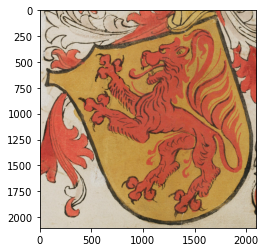

/tmp/ipykernel_1238034/2026331432.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail(avg_size, Image.ANTIALIAS)


Saved image /home/salnabulsi/coat-of-arms/data/new/resized/3324_O G lion rampant.jpg and size is (621, 634)
(621, 624)


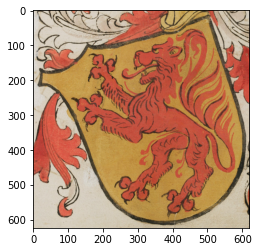

In [53]:


# max image 
image_name = '3324_O G lion rampant.jpg'
image_full_path = root_folder_images + '/' + image_name
image_destination = data_location + '/resized/'+ image_name

org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = _resize_one_image(avg_size, image_full_path, image_destination)
print(res_im.size)
plot_im(res_im)


In [13]:
avg_size = width, height
avg_size

(621, 634)

(600, 679)


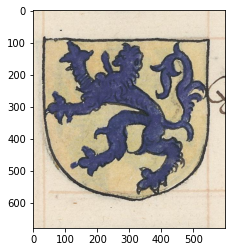

/tmp/ipykernel_1064912/2026331432.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail(avg_size, Image.ANTIALIAS)


FileNotFoundError: [Errno 2] No such file or directory: '/home/salnabulsi/coat-of-arms/data/new/resized-images/22749_O B lion rampant.jpg'

In [15]:
image_name = '22749_O B lion rampant.jpg'
image_full_path = root_folder_images + '/' + image_name
image_destination = data_location + '/resized-images/'+ image_name

org_img = Image.open(image_full_path).convert("RGB")
print(org_img.size)
plot_image(image_full_path)

res_im = _resize_one_image(avg_size, image_full_path, image_destination)
print(res_im.size)
plot_im(res_im)


# Resize the cropped images

In [17]:
convert_in_same_size(data_location, width, height, df['image'])

/tmp/ipykernel_91542/2026331432.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image.thumbnail(avg_size, Image.ANTIALIAS)


Saved image /home/salnabulsi/coat-of-arms/data/new//resized/19245_O B lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/22611_G A 3 lions.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/7788_S A cross.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/9516_O S 3 lions passt guard.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/7350_A V lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/2737_A S 2 lions passt guard.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/5855_O S cross.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/-1_O S lion naissant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/3227_G O 2 lions passt guard.jpg and size is (621, 634)
Saved image /hom

Saved image /home/salnabulsi/coat-of-arms/data/new//resized/17661_V A cross.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/6926_O B lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/6178_A G eagle doubleheaded.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/9298_G O lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/6587_G A eagle.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/18220_A S lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/9961_O G lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/31942_A G lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/19142_V O lion rampant.jpg and size is (621, 634)
Saved image /home/salna

Saved image /home/salnabulsi/coat-of-arms/data/new//resized/2736_A S 2 lions passt guard cowardly.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/597_V O cross moline.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/17931_O B lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/1307_O G eagle.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/16446_A G 2 lions passt guard cr..jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/779_O S 3 lions.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/2617_O G cross.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/1335_G A lion rampant.jpg and size is (621, 634)
Saved image /home/salnabulsi/coat-of-arms/data/new//resized/6250_G O eagle.jpg and size is (621, 634)
Saved image /home/

# Get mean and std

In [58]:
from src.baseline.coa_model import train_validate_test_split
from src.baseline.data_loader import get_loader, get_mean, get_std
from src.baseline.vocabulary import Vocabulary


In [56]:
test_caption_file  = data_location + '/test_real_captions_psumsq.txt'


df = pd.read_csv(test_caption_file)

train_annotation_file = data_location + '/train_captions_psumsq.txt'
val_annotation_file  = data_location + '/val_captions_psumsq.txt'
test_annotation_file  = data_location + '/test_captions_psumsq.txt'

train, validate, test = train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None)
train.to_csv(train_annotation_file, sep=',',index=False)
test.to_csv(test_annotation_file, sep=',',index=False)
validate.to_csv(val_annotation_file, sep=',',index=False)



Train: lion_count:35, eagle_count:29, cross_count:26
Validation: lion_count:14, eagle_count:9, cross_count:7
Test: lion_count:15, eagle_count:8, cross_count:7


In [59]:
NUM_WORKER = 2
freq_threshold = 5
batch_size = 56

# 30 minutes to create those, as it's baseline, i ran it several times and it's the same
vocab = Vocabulary(freq_threshold)
vocab.stoi = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3, 'lion': 4, 'rampant': 5, 'passt': 6, 'guard': 7, 'head': 8, 'lions': 9, 'cross': 10, 'moline': 11, 'patonce': 12, 'eagle': 13, 'doubleheaded': 14, 'eagles': 15, 'a': 16, 'b': 17, 'o': 18, 's': 19, 'g': 20, 'e': 21, 'v': 22, '1': 23, '2': 24, '3': 25, '4': 26, '5': 27, '6': 28, '7': 29, '8': 30, '9': 31, '10': 32, '11': 33}
vocab.itos = {0: '<PAD>', 1: '<SOS>', 2: '<EOS>', 3: '<UNK>', 4: 'lion', 5: 'rampant', 6: 'passt', 7: 'guard', 8: 'head', 9: 'lions', 10: 'cross', 11: 'moline', 12: 'patonce', 13: 'eagle', 14: 'doubleheaded', 15: 'eagles', 16: 'a', 17: 'b', 18: 'o', 19: 's', 20: 'g', 21: 'e', 22: 'v', 23: '1', 24: '2', 25: '3', 26: '4', 27: '5', 28: '6', 29: '7', 30: '8', 31: '9', 32: '10', 33: '11'}

train_loader, train_dataset = get_loader(
    root_folder=root_folder_images,
    annotation_file=train_annotation_file,
    transform=None,  # <=======================
    num_workers=NUM_WORKER,
    vocab=vocab,
    batch_size=batch_size,
    pin_memory=False,
    calc_mean=True
)


In [60]:
mean = get_mean(train_dataset, train_loader, 621 , 624)
std = get_std(train_dataset, train_loader, mean, 621,624)
mean, std

(tensor(0.5207), tensor(0.3287))